# SP2 - Working with data from Boligportalen


Link til website: https://www.boligportal.dk/lejeboliger/københavn 

1. Gå ind på boligportal.dk med selenium
2. Søg på københavn 
3. Hent alle annoncer fra de seneste 24 timer
4. Del annoncer op i kategorier fx. Lejlighed, rækkehus
5. Hvis en graf med antal annoncer ud fra de forskellige kategorier
6. Hvis en graf med gennemsnits lejepris/m2 ud fra de forskellige kategorier"

Websittet har kategoriere indenfor lejeboliger: 
1. Lejlighed
2. Rækkehus
3. Værelse

Spørgsmål 1,2,3 og 4 er løst i filen 'SP2-Bs4-boligportalen.py' og 'apartment.py'

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/markus/docker_notebooks/notebooks/my_notebook/SP2/boligportalen.csv')

In [2]:
df.describe()

,Unnamed: 0,price,square_meter,rooms
count,96.000000,96.00000,96.000000,96.000000
mean,47.500000,13670.21875,90.375000,3.020833
std,27.856777,4944.72622,42.923003,1.383962
min,0.000000,4000.00000,8.000000,1.000000
25%,23.750000,11495.00000,66.000000,2.000000
50%,47.500000,13495.00000,91.500000,3.000000
75%,71.250000,16705.00000,114.000000,4.000000
max,95.000000,24500.00000,191.000000,6.000000


In [3]:
pd.set_option("display.max_rows", None)
df

,Unnamed: 0,type,price,square_meter,location,rooms,link,created,fetched
0,0,Lejlighed,11995,73,"København, Løgæblevej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 min. siden,2022-03-31
1,1,Lejlighed,16650,91,"København, Etta Camerons Vej",3,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,17 min. siden,2022-03-31
2,2,Lejlighed,20800,110,"København, Dampfærgevej",4,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,46 min. siden,2022-03-31
3,3,Lejlighed,12695,80,"København, Cylindervej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,57 min. siden,2022-03-31
4,4,Lejlighed,23075,142,"København, Linnésgade",4,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31
5,5,Lejlighed,13157,93,"København, Paradisæblevej",3,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31
6,6,Lejlighed,13260,96,"København, Paradisæblevej",3,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31
7,7,Lejlighed,10157,60,"København, Ingrid Marievej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31
8,8,Lejlighed,10362,64,"København, Ingrid Marievej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31
9,9,Lejlighed,13250,79,"København, Alliancevej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31


In [4]:
#Check for duplicated column values (Link should be unique)
boolean = df['link'].duplicated().any()
print(boolean)

True


In [5]:
# Select all duplicate rows. 6 articles are marked as 'Fremhævet' on every pages we scrape. 
print(len(df[df.duplicated(['link'], keep=False)]))
df[df.duplicated(['link'], keep=False)]

24


,Unnamed: 0,type,price,square_meter,location,rooms,link,created,fetched
18,18,Lejlighed,19995,136,"Rødovre, Nørregårdsbakken",5,www.boligportal.dk/lejligheder/r%C3%B8dovre/13...,22. marts,2022-03-31
19,19,Lejlighed,17495,146,"Rødovre, Nørregårdsbakken",4,www.boligportal.dk/lejligheder/r%C3%B8dovre/14...,23. februar,2022-03-31
20,20,Lejlighed,13800,88,"Søborg, Buddinge Hovedgade",3,www.boligportal.dk/lejligheder/s%C3%B8borg/88m...,3. marts,2022-03-31
21,21,Lejlighed,24500,191,"Hellerup, Gersonsvej",6,www.boligportal.dk/lejligheder/hellerup/191m2-...,8. februar,2022-03-31
22,22,Rækkehus,16995,150,"Rødovre, Nørregårdsbakken",4,www.boligportal.dk/r%C3%A6kkehuse/r%C3%B8dovre...,8. november,2022-03-31
23,23,Lejlighed,6995,39,"Vanløse, Godthåbsvej",1,www.boligportal.dk/lejligheder/vanl%C3%B8se/39...,24. februar,2022-03-31
42,42,Lejlighed,19995,136,"Rødovre, Nørregårdsbakken",5,www.boligportal.dk/lejligheder/r%C3%B8dovre/13...,22. marts,2022-03-31
43,43,Lejlighed,17495,146,"Rødovre, Nørregårdsbakken",4,www.boligportal.dk/lejligheder/r%C3%B8dovre/14...,23. februar,2022-03-31
44,44,Lejlighed,13800,88,"Søborg, Buddinge Hovedgade",3,www.boligportal.dk/lejligheder/s%C3%B8borg/88m...,3. marts,2022-03-31
45,45,Lejlighed,24500,191,"Hellerup, Gersonsvej",6,www.boligportal.dk/lejligheder/hellerup/191m2-...,8. februar,2022-03-31


#### Deleting duplicate rows

In [6]:
df.drop_duplicates(subset ="link",
                     keep = False, inplace = True)
print(df.shape)

(72, 9)


### 5. Hvis en graf med antal annoncer ud fra de forskellige kategorier

<AxesSubplot:>

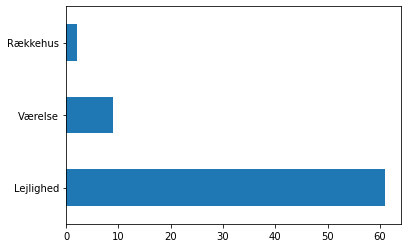

In [7]:
#counts every type column by type and plots it into a bar chart.
df['type'].value_counts().plot(kind='barh')

### 6. Hvis en graf med gennemsnits lejepris/m2 ud fra de forskellige kategorier

In [11]:
df["sqaure_meter_price"] = df["price"] / df['square_meter']
df

,Unnamed: 0,type,price,square_meter,location,rooms,link,created,fetched,sqaure_meter_price
0,0,Lejlighed,11995,73,"København, Løgæblevej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 min. siden,2022-03-31,164.315068
1,1,Lejlighed,16650,91,"København, Etta Camerons Vej",3,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,17 min. siden,2022-03-31,182.967033
2,2,Lejlighed,20800,110,"København, Dampfærgevej",4,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,46 min. siden,2022-03-31,189.090909
3,3,Lejlighed,12695,80,"København, Cylindervej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,57 min. siden,2022-03-31,158.687500
4,4,Lejlighed,23075,142,"København, Linnésgade",4,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31,162.500000
5,5,Lejlighed,13157,93,"København, Paradisæblevej",3,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31,141.473118
6,6,Lejlighed,13260,96,"København, Paradisæblevej",3,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31,138.125000
7,7,Lejlighed,10157,60,"København, Ingrid Marievej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31,169.283333
8,8,Lejlighed,10362,64,"København, Ingrid Marievej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31,161.906250
9,9,Lejlighed,13250,79,"København, Alliancevej",2,www.boligportal.dk/lejligheder/k%C3%B8benhavn/...,1 time siden,2022-03-31,167.721519


Text(0.5, 1.0, 'Price per square meter diveded by type')

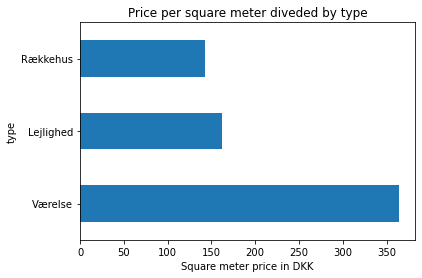

In [17]:
df.groupby('type')['sqaure_meter_price'].mean().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Square meter price in DKK')
plt.title('Price per square meter diveded by type')